In [715]:
#importacion de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #Para quitar avisos en las gráficas

In [716]:
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer



In [717]:
# Configura la opción de visualización para mostrar todas las columnas del DataFrame, sin limitaciones.
pd.set_option('display.max_columns', None)

##Exploración de datos

In [718]:
## 2. importacion de los datos Customer Flight Analysis.csv

df_Customer_Flight = pd.read_csv("./Files./Customer_Flight_Activity.csv")# No pongo indices dejo como columnas para poder hacer visualizaciones y poder usar todas las columnas
df_Customer_Flight.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [719]:
df_Customer_Flight.info #informacion general de df

<bound method DataFrame.info of         Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0               100018  2017      1               3                        0   
1               100102  2017      1              10                        4   
2               100140  2017      1               6                        0   
3               100214  2017      1               0                        0   
4               100272  2017      1               0                        0   
...                ...   ...    ...             ...                      ...   
405619          999902  2018     12               0                        0   
405620          999911  2018     12               0                        0   
405621          999940  2018     12               3                        0   
405622          999982  2018     12               0                        0   
405623          999986  2018     12               0                        0   

       

In [720]:
# Mostrar número de filas y columnas.
df_Customer_Flight.shape

(405624, 10)

In [721]:
# Muestra los nombres de todas las columnas.
df_Customer_Flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [722]:
# Genera un resumen estadístico de las columnas numéricas del DataFrame.El dataframe es solo numérico, no se puede mirar el resumen estadistico en las columnas categóricas.
df_Customer_Flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [723]:
#muestra los valores nulos
df_Customer_Flight.isnull().sum()


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [724]:
# Muestra el tipo de dato de cada columna.
df_Customer_Flight.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [725]:
df_Customer_Flight["Month"].unique()#Comprobar que los numeros son del 1 al 12

array([ 1,  9,  2,  3, 11,  4,  5,  7,  6,  8, 10, 12], dtype=int64)

In [726]:
# Muestra el número total de filas duplicadas.
df_Customer_Flight.duplicated().sum()

1864

In [ ]:
#Cambios a realizar en el df
## cambiar el formato del mes de números a texto
## no hay valores nulos
## si hay duplicados 

In [728]:
#Importación de los datos Customer Loyalty History.csv

df_Customer_Loyalty = pd.read_csv('./files/Customer_Loyalty_History.csv')# No pongo indices dejo como columnas para poder hacer visualizaciones y poder usar todas las columnas
df_Customer_Loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [729]:
# Mostrar número de filas y columnas.
df_Customer_Loyalty.shape

(16737, 16)

In [730]:
df_Customer_Loyalty.info #informacin general de df

<bound method DataFrame.info of        Loyalty Number Country          Province        City Postal Code  \
0              480934  Canada           Ontario     Toronto     M2Z 4K1   
1              549612  Canada           Alberta    Edmonton     T3G 6Y6   
2              429460  Canada  British Columbia   Vancouver     V6E 3D9   
3              608370  Canada           Ontario     Toronto     P1W 1K4   
4              530508  Canada            Quebec        Hull     J8Y 3Z5   
...               ...     ...               ...         ...         ...   
16732          823768  Canada  British Columbia   Vancouver     V6E 3Z3   
16733          680886  Canada      Saskatchewan      Regina     S1J 3C5   
16734          776187  Canada  British Columbia   Vancouver     V5R 1W3   
16735          906428  Canada             Yukon  Whitehorse     Y2K 6R0   
16736          652627  Canada          Manitoba    Winnipeg     R2C 0M5   

       Gender Education    Salary Marital Status Loyalty Card      

In [731]:
# Muestra los nombres de todas las columnas.
df_Customer_Loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [732]:
# Muestra el tipo de dato de cada columna.
df_Customer_Loyalty.dtypes

Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

In [733]:
df_Customer_Loyalty["Gender"].unique() #Mirar si estan definidos como male y female

array(['Female', 'Male'], dtype=object)

In [734]:
df_Customer_Loyalty["Education"].unique()#Mirar como estan definidos

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [735]:
df_Customer_Loyalty["Marital Status"].unique() #Mirar como estan definidos

array(['Married', 'Divorced', 'Single'], dtype=object)

In [736]:
df_Customer_Loyalty["Loyalty Card"].unique()#Mirar si indica el nivel


array(['Star', 'Aurora', 'Nova'], dtype=object)

In [737]:
# Muestra el número total de filas duplicadas.
df_Customer_Loyalty.duplicated().sum()

0

In [ ]:
#muestra los valores nulos por porcentaje
df_Customer_Loyalty.isnull().sum()/df_Customer_Loyalty.shape[0]*100


Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [739]:
# Genera un resumen estadístico de las columnas numéricas del DataFrame.
df_Customer_Loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [740]:
# Genera un resumen estadístico de las columnas categóricas del DataFrame.
df_Customer_Loyalty.describe(include='object').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [741]:
df_Customer_Loyalty["Enrollment Month"].unique()#mirar si esta en números del 1 al 12

array([ 2,  3,  7, 10,  5,  6, 12,  1, 11,  8,  4,  9], dtype=int64)

In [742]:
#Enrollment Month pasar de int a texto
#Cancellation Year,Cancellation Month eliminar por que la mayoria son nulos.
#Hay salarios negativos pasarlos a valor absoluto(no negativo)
#Hay salarios nulos, decidir que hacer con ellos





In [743]:
#Unir los Df por merge left por que quiero todos los datos de los vuelos y los clientes 
df = df_Customer_Loyalty.merge(df_Customer_Flight,on = "Loyalty Number", how="left")
df.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


In [ ]:
df.columns #Mirar las columnas

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

##Limpieza de datos

In [745]:
#Cancellation Year,Cancellation Month eliminar porque mas de un 87%  son nulos.
df.drop(columns=['Cancellation Year', 'Cancellation Month'], axis = 1, inplace = True)#axis le digo que es una columna e inplace= True por que quiero que lo elimine del df


In [746]:
df.columns #comprobar que se han eliminado

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Year',
       'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [747]:
## cambiar el formato de Month y Enrollment Month  de int a texto , para poder cambiar los números por texto en los meses del año
columnas = ["Month", "Enrollment Month"]
for i in columnas: 
    df[i]= df[i].astype(object)



In [748]:
df["Enrollment Month"].dtype #Controlar que ha cambiado el formato

dtype('O')

In [749]:
df["Month"].dtype #Controlar que ha cambiado el formato

dtype('O')

In [750]:
#cambiar los numeros por el texto en los mese del año
columnas = ["Month", "Enrollment Month"]
for i in columnas:
    df[i]= df[i].replace({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6:"June", 7:"July", 8:"August", 9 :"September", 10:"October", 11:"November",12:"December"})

In [751]:
df["Month"].unique()# comprobar si estan cambiadas las columnas

array(['January', 'February', 'March', 'April', 'October', 'May', 'June',
       'July', 'August', 'September', 'November', 'December'],
      dtype=object)

In [752]:
df["Enrollment Month"].unique() #comprobar si estan cambiadas las columnas

array(['February', 'March', 'July', 'October', 'May', 'June', 'December',
       'January', 'November', 'August', 'April', 'September'],
      dtype=object)

In [753]:
# Convierte los valores negativos en la columna 'Salary' a positivos, manteniendo solo el valor absoluto.
df['Salary'] = df['Salary'].abs()

In [754]:
df["Salary"].min() #Comprobar si ha realizado el cambio

9081.0

In [755]:
#Eliminar filas duplicados
df.drop_duplicates(subset=None,keep='first',inplace=True) #subset none(quiero eliminar las filas enteras duplicadas)keep, me quedo con la primera fila duplicada 

In [756]:
df.shape# Mostrar número de filas y columnas.

(403760, 23)

In [757]:
#Hay salarios nulos, como son el 25% que es un porcentaje alto, considero utilizar Iterative Imputer, que rellenara los huecos de los salarios para que la información tenga sentido

imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df['Salary'] = imputer_iter.fit_transform(df[['Salary']])

In [758]:
df.isnull().sum()/df_Customer_Loyalty.shape[0]*100 #Comprobar si hay nulos

Loyalty Number                 0.0
Country                        0.0
Province                       0.0
City                           0.0
Postal Code                    0.0
Gender                         0.0
Education                      0.0
Salary                         0.0
Marital Status                 0.0
Loyalty Card                   0.0
CLV                            0.0
Enrollment Type                0.0
Enrollment Year                0.0
Enrollment Month               0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

##Visualización de datos

In [759]:
warnings.simplefilter(action='ignore',category=FutureWarning) #para ignorar las advertencias de los errores de las gráficas

In [760]:
#¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
flights_grouped = df.groupby(['Month'])["Flights Booked"].sum().reset_index()
flights_grouped




,Month,Flights Booked
0,April,112511
1,August,169204
2,December,166047
3,February,96334
4,January,96936
5,July,193431
6,June,173242
7,March,131199
8,May,142170
9,November,122250


In [761]:
order_Month=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"] #Definir el orden de los meses

In [762]:
 #Convertir la columna 'Month' a tipo 'category' con el orden definido
flights_grouped['Month'] = pd.Categorical(flights_grouped['Month'], categories=order_Month, ordered=True)

In [763]:
# Ordenar el DataFrame por la columna 'Month'
flights_grouped = flights_grouped.sort_values('Month')

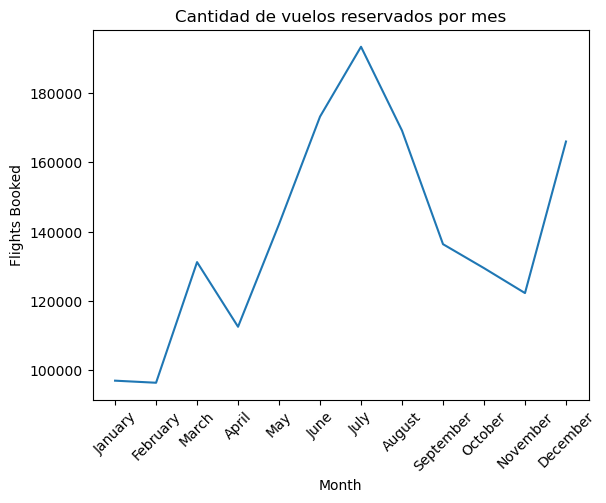

In [764]:
sns.lineplot(data=flights_grouped, x="Month", y ='Flights Booked')
plt.title('Cantidad de vuelos reservados por mes')
plt.xticks(rotation=45)
plt.show()

El gráfico muestra una variación considerable en la cantidad de vuelos reservados a lo largo del año.
El mes de Julio es el que más éxito tiene para viajar, en cambio Enero y Febrero son los menos solicitados y vuelve a haber un repunte en Navidades

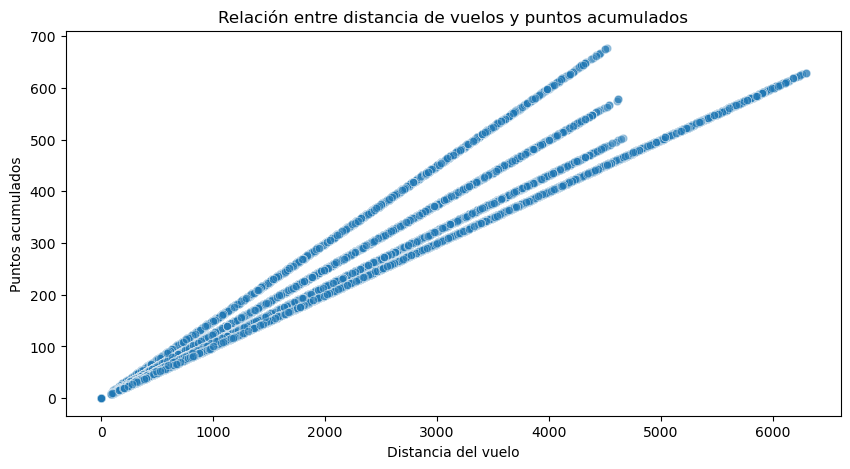

In [ ]:
#¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Distance', y='Points Accumulated', data=df, alpha=0.5)
plt.title("Relación entre distancia de vuelos y puntos acumulados")
plt.xlabel("Distancia del vuelo")
plt.ylabel("Puntos acumulados")
plt.show()


Si hay relación directa fuerte, Cuanta más distancia recorra el vuelo , más puntos acumula el cliente. No se observan valores atípicos significativos que se alejen mucho de la tendencia general.

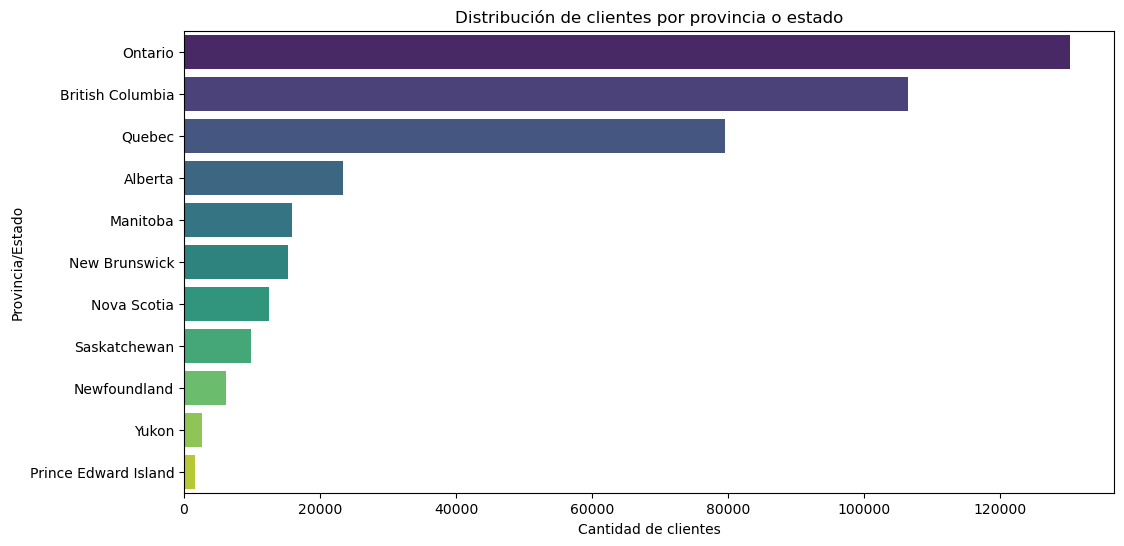

In [766]:
#¿Cuál es la distribución de los clientes por provincia o estado?
plt.figure(figsize=(12, 6))
sns.countplot(y='Province', data=df, palette='viridis', order=df['Province'].value_counts().index)
plt.title("Distribución de clientes por provincia o estado")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Provincia/Estado")
plt.show()


 Ontario lidera la densidad de clientes, seguida de  British Columbia y Quebec. Estos tres estados tienen una diferencia considerable con el resto .Cabe destacar que hay excasez de clientes en Yukon y sobretodo en Prince Edward Island

In [767]:
#¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [768]:
education_order = ['High School or Below','Bachelor','College', 'Master', 'Doctor'] # Ordeno la educación por niveles.

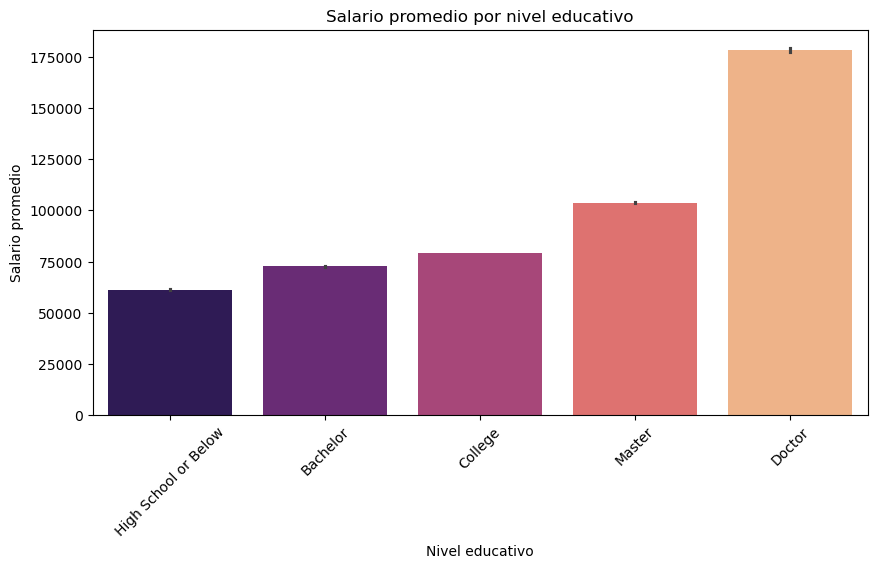

In [769]:

plt.figure(figsize=(10, 5))
sns.barplot(x='Education', y='Salary', data=df, estimator=np.mean, palette='magma',order=education_order)
plt.title("Salario promedio por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.xticks(rotation=45)
plt.show()

Esta gráfica sugiere que hay una correlación positiva entre educación y salario. Cuanto más nivel educativo, el salario aumenta. 

In [770]:
#¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
customer_card = df.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()  # Agrupo para saber la suma de los clientes por el tipo de tarjeta que tienen 

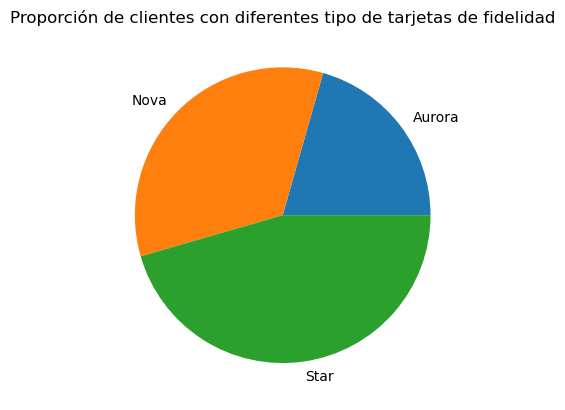

In [771]:
plt.pie(customer_card['Loyalty Number'], labels=customer_card['Loyalty Card'])
plt.title('Proporción de clientes con diferentes tipo de tarjetas de fidelidad')
plt.show()

La tarjeta Star es la más popular entre los clientes, seguida por Nova. La tarjeta Aurora es la menos contratada por los clientes

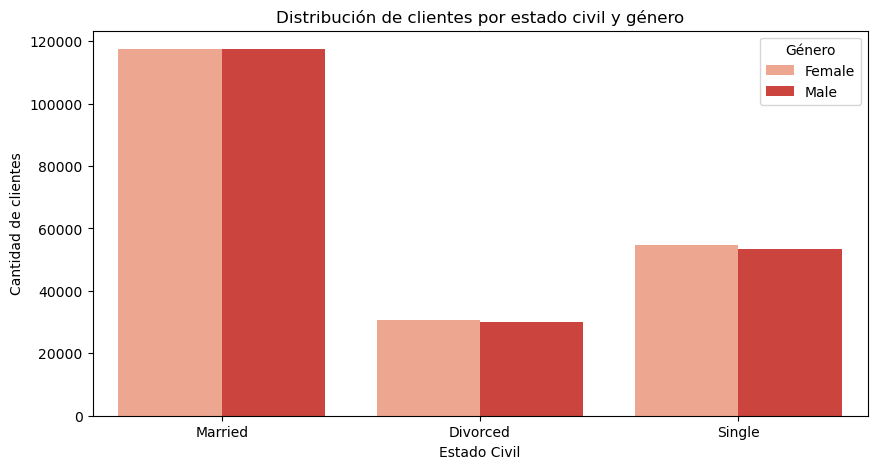

In [772]:
#¿Cómo se distribuyen los clientes según su estado civil y género? #utilizo countplot para que me haga un conteo por marital status y que me lo separe en generos
plt.figure(figsize=(10, 5))
sns.countplot(x='Marital Status', hue='Gender', data=df, palette='Reds')
plt.title("Distribución de clientes por estado civil y género")
plt.xlabel("Estado Civil")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Género")
plt.show()

La cantidad de clientes casados es significativamente mayor que la de divorciados o solteros, No hay practicamente diferencia entre un género y otro.